# Evaluation of the Fully Supervised with Self-Supervised Embeddings Framework

In [ ]:
# All Imports
import os
import sys
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.models import resnet18
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

# Import TPCRP (Typiclust) functions from typiclust_alg.py
from typiclust_alg import SimCLRResNet18, compute_embeddings, typical_clustering_selection, DEVICE

# Import visualization and seed utilities from visualisation.py
from visualisation import plot_tsne, set_seed, plot_selected_images_by_label

# Get the absolute path of the parent directory (main directory)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add parent directory to sys.path
sys.path.append(parent_dir)

# Device Configuration
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# CIFAR-10 Class Names
cifar10_labels = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 
                   5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

Using device: cuda


In [17]:
# Ensure reproducibility 
def set_seed(seed=35):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    print(f"Random seed set to {seed}")

set_seed(35)

Random seed set to 35


Random seed set to 30

--- Evaluating for Budget = 10, Method = typiclust ---

=== Fully Supervised with Self-Supervised Embeddings Evaluation ===
Files already downloaded and verified
Files already downloaded and verified


c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Loaded pretrained SimCLR model.


C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=DEV

Loaded pretrained SimCLR model for TPCRP selection.
Unique final selected indices: 10
selected_indices: [np.int64(19208), np.int64(45037), np.int64(35599), np.int64(13575), np.int64(47409), np.int64(33245), np.int64(1387), np.int64(39134), np.int64(44967), np.int64(48690)]
Number of clusters (budget) = 10
Number of typical points selected = 10


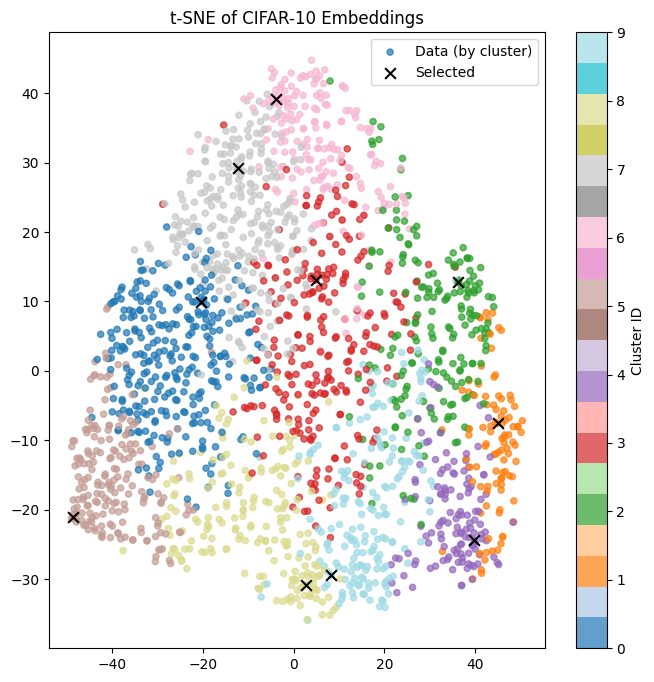

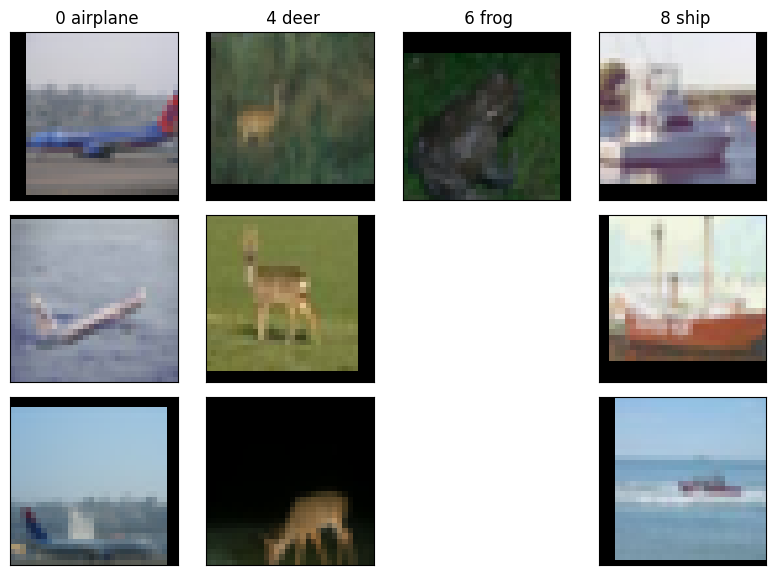

Number of training samples selected: 10
[Linear Eval] Epoch [1/100] Loss: 2.5062
[Linear Eval] Epoch [2/100] Loss: 39.3253
[Linear Eval] Epoch [3/100] Loss: 186.4276
[Linear Eval] Epoch [4/100] Loss: 278.6409
[Linear Eval] Epoch [5/100] Loss: 38.8178
[Linear Eval] Epoch [6/100] Loss: 154.6226
[Linear Eval] Epoch [7/100] Loss: 184.4582
[Linear Eval] Epoch [8/100] Loss: 207.1596
[Linear Eval] Epoch [9/100] Loss: 133.0848
[Linear Eval] Epoch [10/100] Loss: 174.9445
[Linear Eval] Epoch [11/100] Loss: 85.9153
[Linear Eval] Epoch [12/100] Loss: 51.5551
[Linear Eval] Epoch [13/100] Loss: 74.9796
[Linear Eval] Epoch [14/100] Loss: 12.7553
[Linear Eval] Epoch [15/100] Loss: 113.9213
[Linear Eval] Epoch [16/100] Loss: 27.2828
[Linear Eval] Epoch [17/100] Loss: 20.5432
[Linear Eval] Epoch [18/100] Loss: 33.1031
[Linear Eval] Epoch [19/100] Loss: 53.0500
[Linear Eval] Epoch [20/100] Loss: 41.6621
[Linear Eval] Epoch [21/100] Loss: 22.4342
[Linear Eval] Epoch [22/100] Loss: 40.4635
[Linear Eval] Ep

c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Loaded pretrained SimCLR model.
Loaded pretrained SimCLR model for TPCRP selection.


C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=DEV

Unique final selected indices: 20
selected_indices: [np.int64(39134), np.int64(19936), np.int64(9985), np.int64(46964), np.int64(46215), np.int64(29266), np.int64(2172), np.int64(17490), np.int64(23472), np.int64(31245), np.int64(21248), np.int64(36484), np.int64(16801), np.int64(48602), np.int64(43047), np.int64(49261), np.int64(46673), np.int64(36778), np.int64(9826), np.int64(40695)]
Number of clusters (budget) = 20
Number of typical points selected = 20


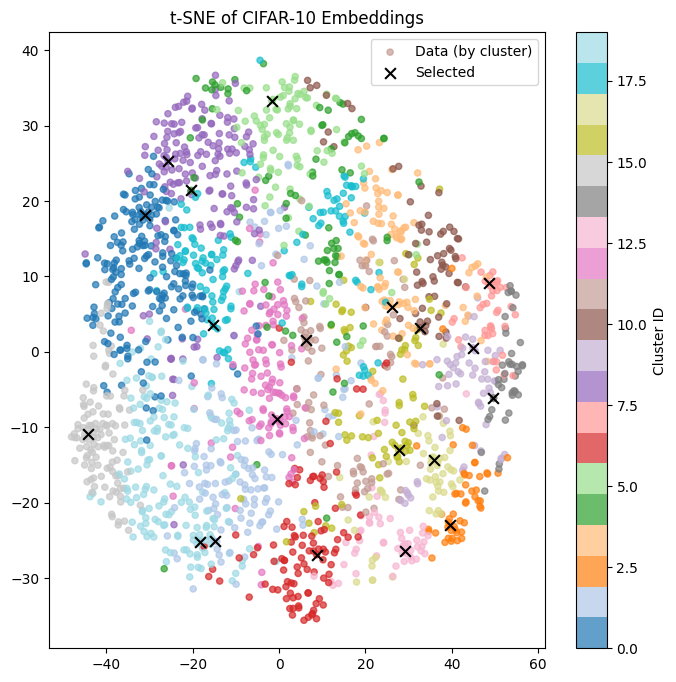

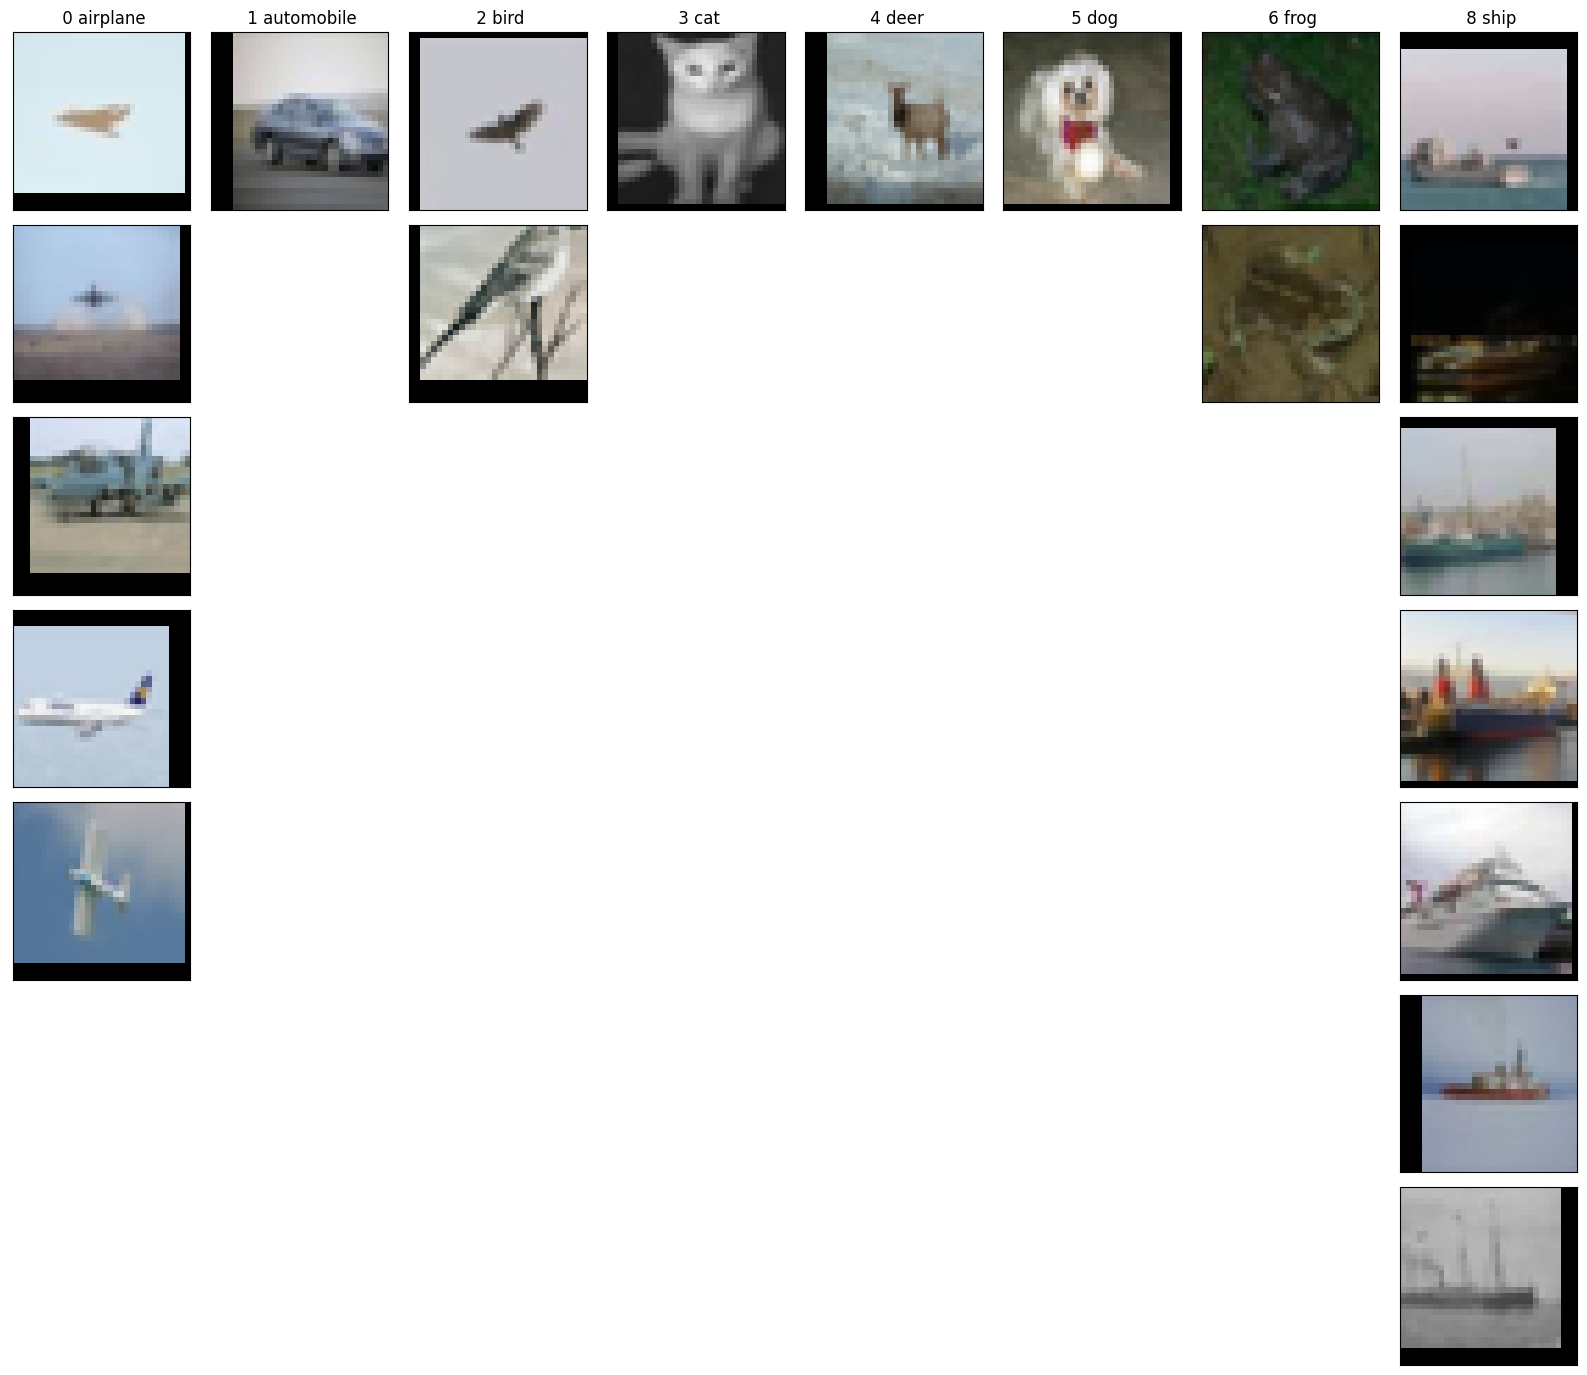

Number of training samples selected: 20
[Linear Eval] Epoch [1/100] Loss: 2.2634
[Linear Eval] Epoch [2/100] Loss: 77.8276
[Linear Eval] Epoch [3/100] Loss: 285.1398
[Linear Eval] Epoch [4/100] Loss: 175.4046
[Linear Eval] Epoch [5/100] Loss: 175.3890
[Linear Eval] Epoch [6/100] Loss: 309.1768
[Linear Eval] Epoch [7/100] Loss: 235.4886
[Linear Eval] Epoch [8/100] Loss: 313.5425
[Linear Eval] Epoch [9/100] Loss: 366.4767
[Linear Eval] Epoch [10/100] Loss: 347.1493
[Linear Eval] Epoch [11/100] Loss: 298.4497
[Linear Eval] Epoch [12/100] Loss: 428.8155
[Linear Eval] Epoch [13/100] Loss: 620.7856
[Linear Eval] Epoch [14/100] Loss: 389.5819
[Linear Eval] Epoch [15/100] Loss: 355.9667
[Linear Eval] Epoch [16/100] Loss: 276.5092
[Linear Eval] Epoch [17/100] Loss: 376.6893
[Linear Eval] Epoch [18/100] Loss: 305.5643
[Linear Eval] Epoch [19/100] Loss: 232.3208
[Linear Eval] Epoch [20/100] Loss: 211.2236
[Linear Eval] Epoch [21/100] Loss: 208.5913
[Linear Eval] Epoch [22/100] Loss: 280.7479
[Lin

c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Loaded pretrained SimCLR model.
Loaded pretrained SimCLR model for TPCRP selection.


C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=DEV

Unique final selected indices: 30
selected_indices: [np.int64(45446), np.int64(44454), np.int64(13117), np.int64(5589), np.int64(8526), np.int64(46215), np.int64(36494), np.int64(5742), np.int64(45924), np.int64(14385), np.int64(27734), np.int64(25399), np.int64(34274), np.int64(49532), np.int64(36939), np.int64(35266), np.int64(26593), np.int64(33694), np.int64(40350), np.int64(49316), np.int64(20051), np.int64(30971), np.int64(36484), np.int64(12120), np.int64(26188), np.int64(14899), np.int64(48604), np.int64(19985), np.int64(9120), np.int64(10646)]
Number of clusters (budget) = 30
Number of typical points selected = 30


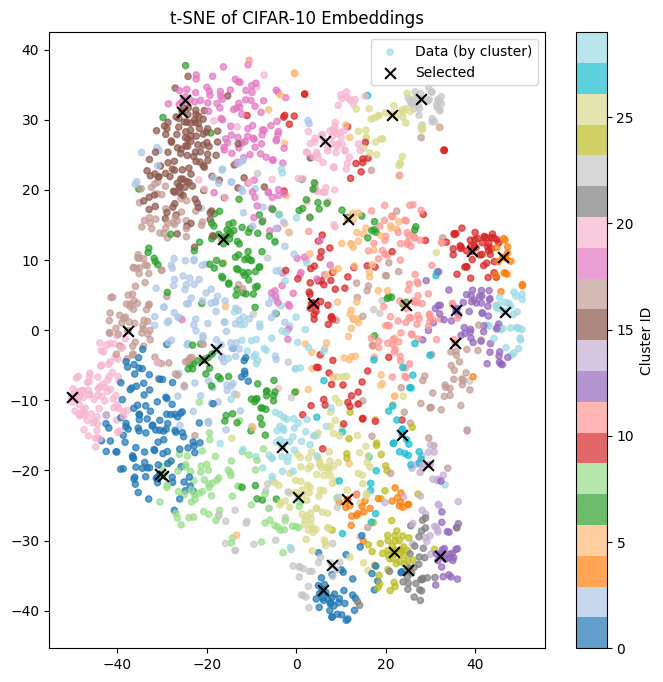

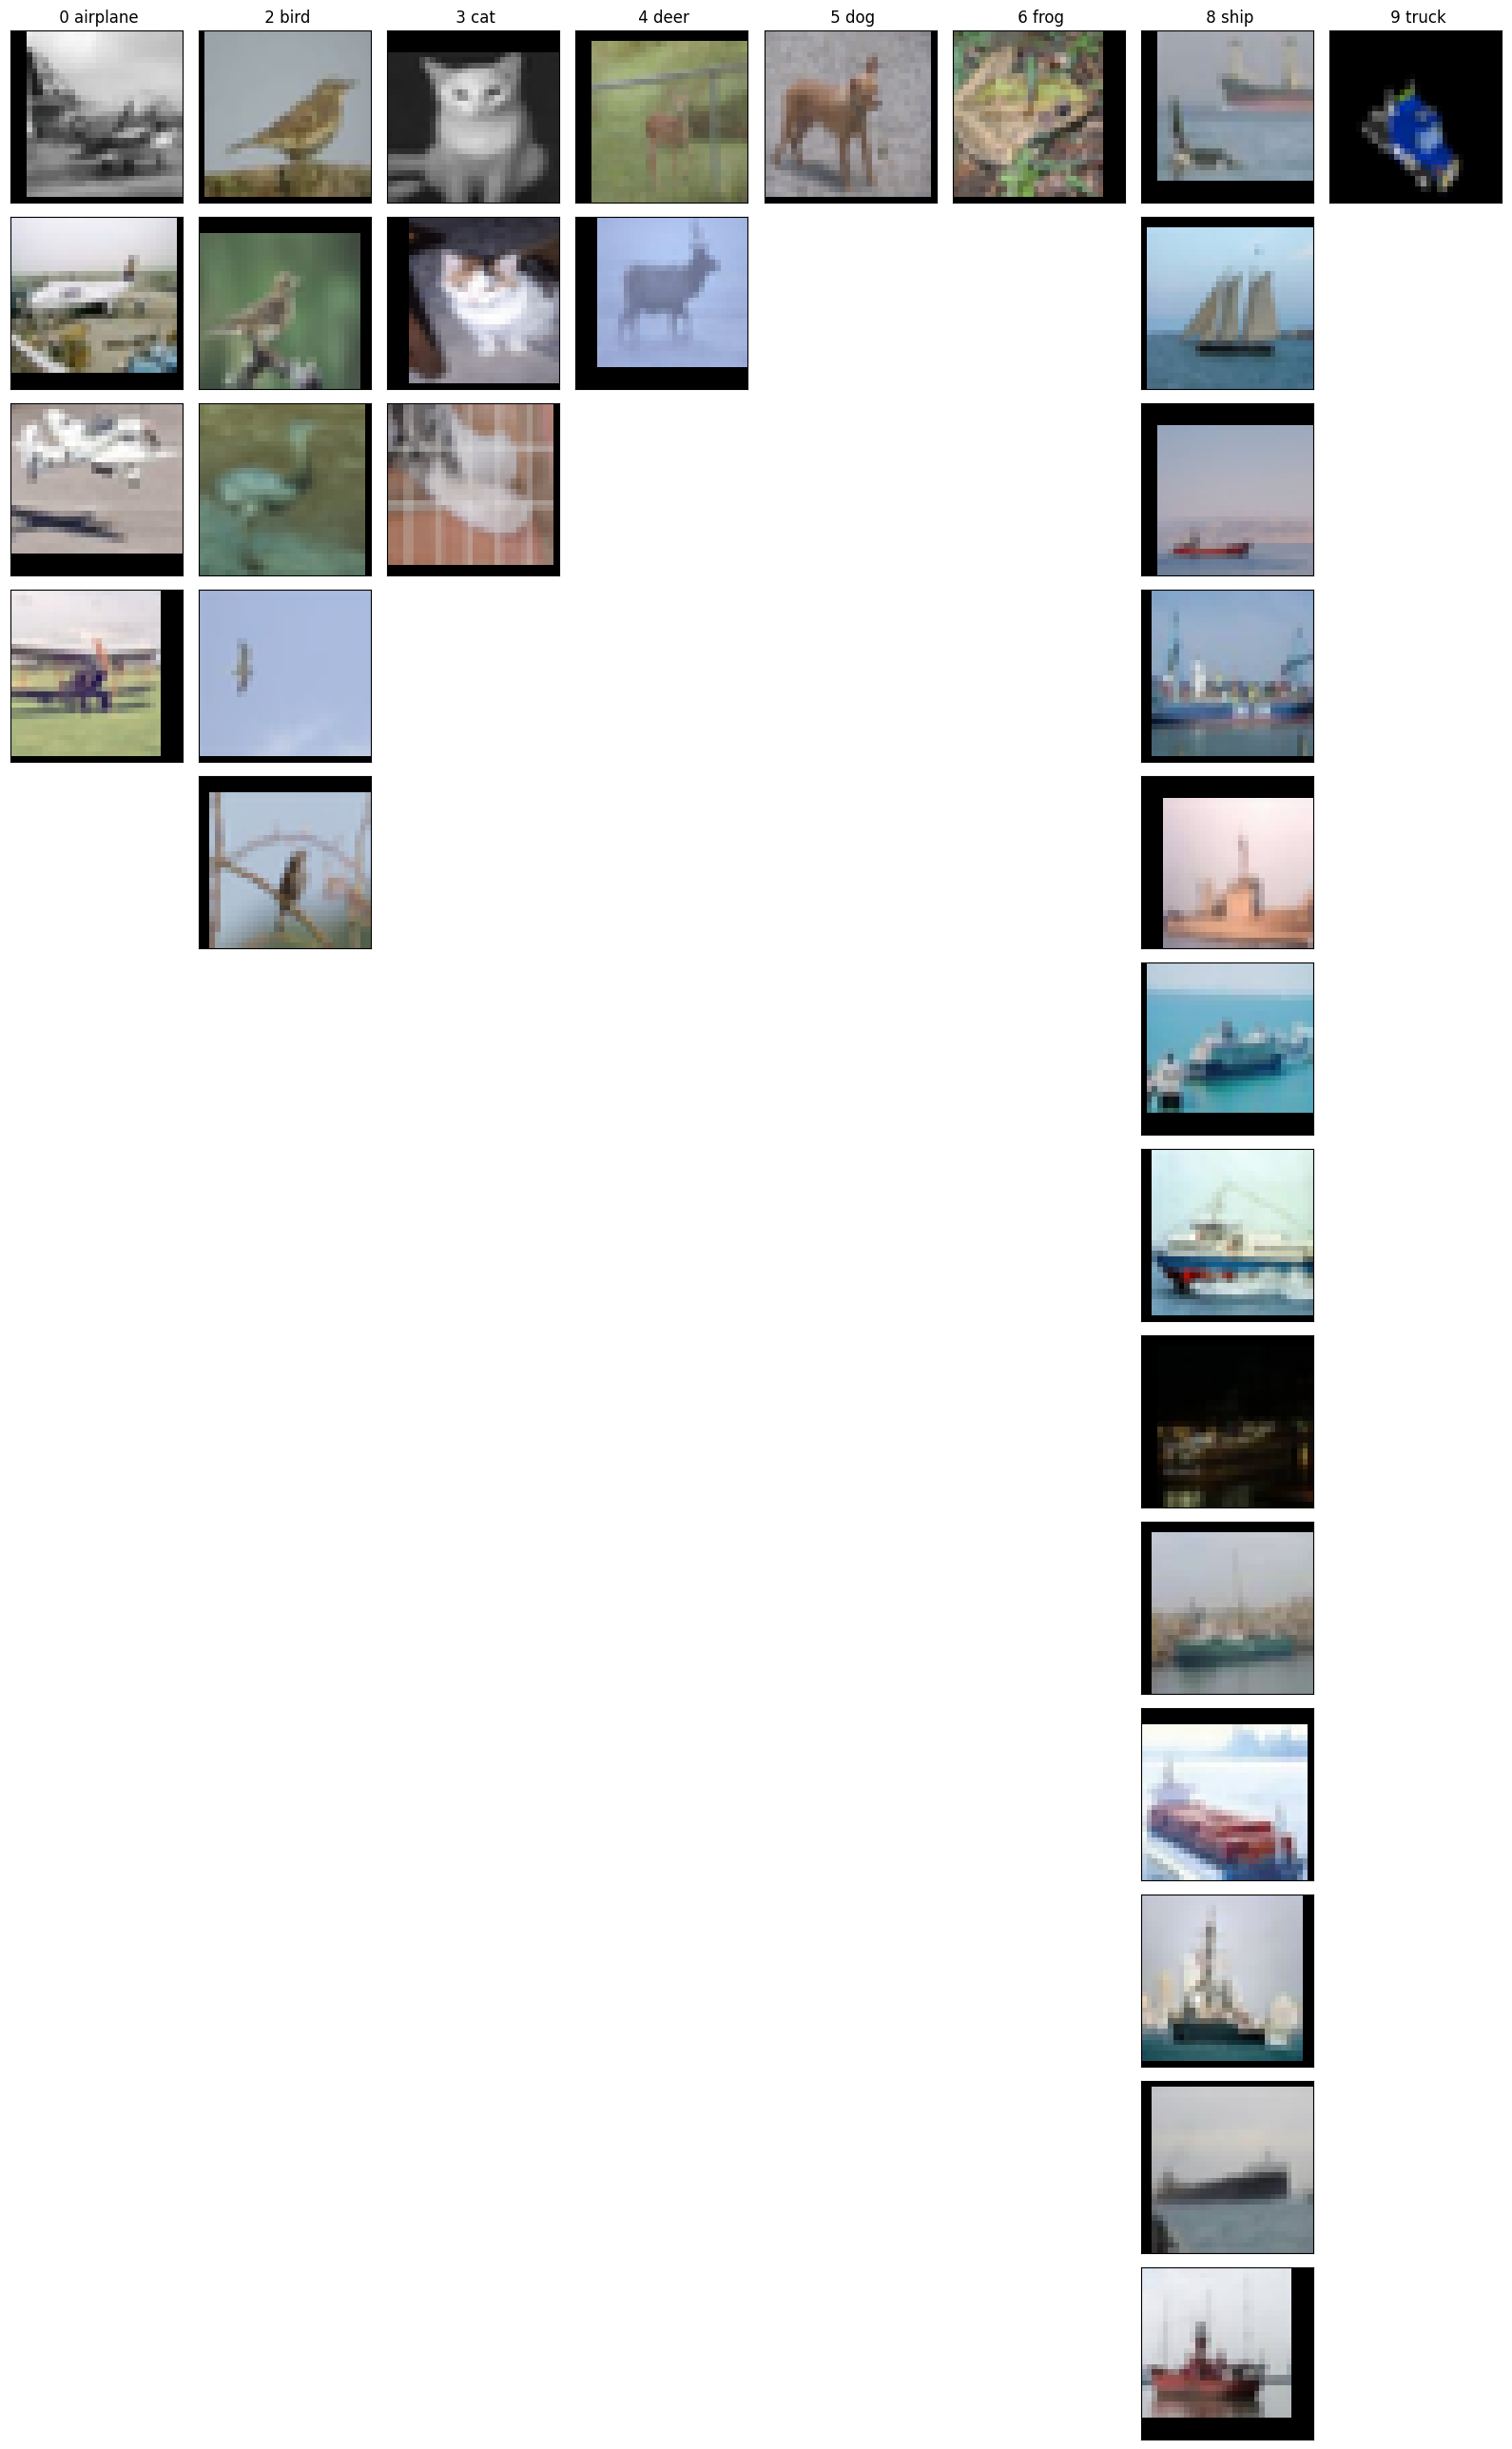

Number of training samples selected: 30
[Linear Eval] Epoch [1/100] Loss: 2.2996
[Linear Eval] Epoch [2/100] Loss: 129.1303
[Linear Eval] Epoch [3/100] Loss: 94.1296
[Linear Eval] Epoch [4/100] Loss: 153.7361
[Linear Eval] Epoch [5/100] Loss: 196.4713
[Linear Eval] Epoch [6/100] Loss: 343.0019
[Linear Eval] Epoch [7/100] Loss: 456.8532
[Linear Eval] Epoch [8/100] Loss: 368.2706
[Linear Eval] Epoch [9/100] Loss: 332.3608
[Linear Eval] Epoch [10/100] Loss: 339.9507
[Linear Eval] Epoch [11/100] Loss: 357.3265
[Linear Eval] Epoch [12/100] Loss: 241.7826
[Linear Eval] Epoch [13/100] Loss: 450.3813
[Linear Eval] Epoch [14/100] Loss: 224.5204
[Linear Eval] Epoch [15/100] Loss: 319.3870
[Linear Eval] Epoch [16/100] Loss: 186.8432
[Linear Eval] Epoch [17/100] Loss: 343.7592
[Linear Eval] Epoch [18/100] Loss: 283.5954
[Linear Eval] Epoch [19/100] Loss: 400.5235
[Linear Eval] Epoch [20/100] Loss: 391.1840
[Linear Eval] Epoch [21/100] Loss: 339.1214
[Linear Eval] Epoch [22/100] Loss: 237.7184
[Lin

c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Loaded pretrained SimCLR model.


C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=DEV

Loaded pretrained SimCLR model for TPCRP selection.
Unique final selected indices: 40
selected_indices: [np.int64(39942), np.int64(5636), np.int64(579), np.int64(26105), np.int64(6676), np.int64(600), np.int64(6985), np.int64(44711), np.int64(39032), np.int64(47433), np.int64(35132), np.int64(21683), np.int64(31238), np.int64(30857), np.int64(40468), np.int64(42382), np.int64(38638), np.int64(7283), np.int64(3258), np.int64(49458), np.int64(35458), np.int64(12951), np.int64(27596), np.int64(21446), np.int64(45959), np.int64(15635), np.int64(22363), np.int64(40165), np.int64(11283), np.int64(46756), np.int64(47630), np.int64(21339), np.int64(6406), np.int64(29290), np.int64(37100), np.int64(13982), np.int64(39232), np.int64(1392), np.int64(18700), np.int64(19995)]
Number of clusters (budget) = 40
Number of typical points selected = 40


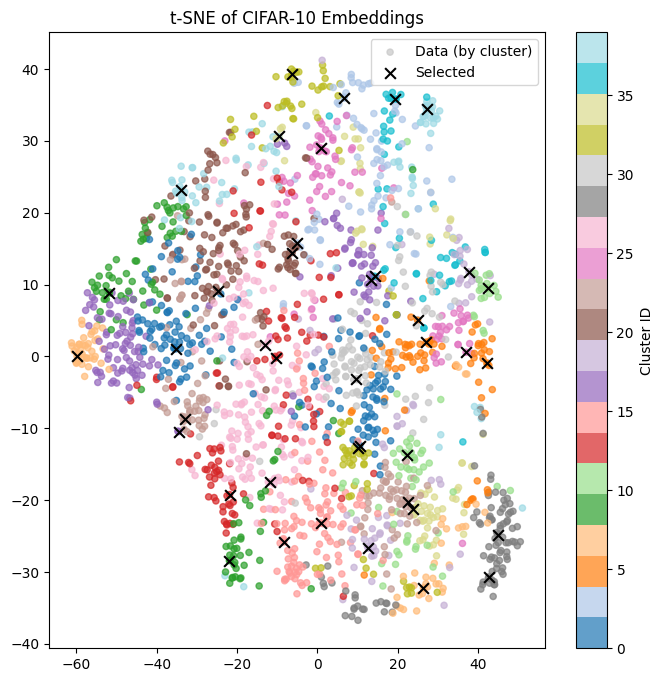

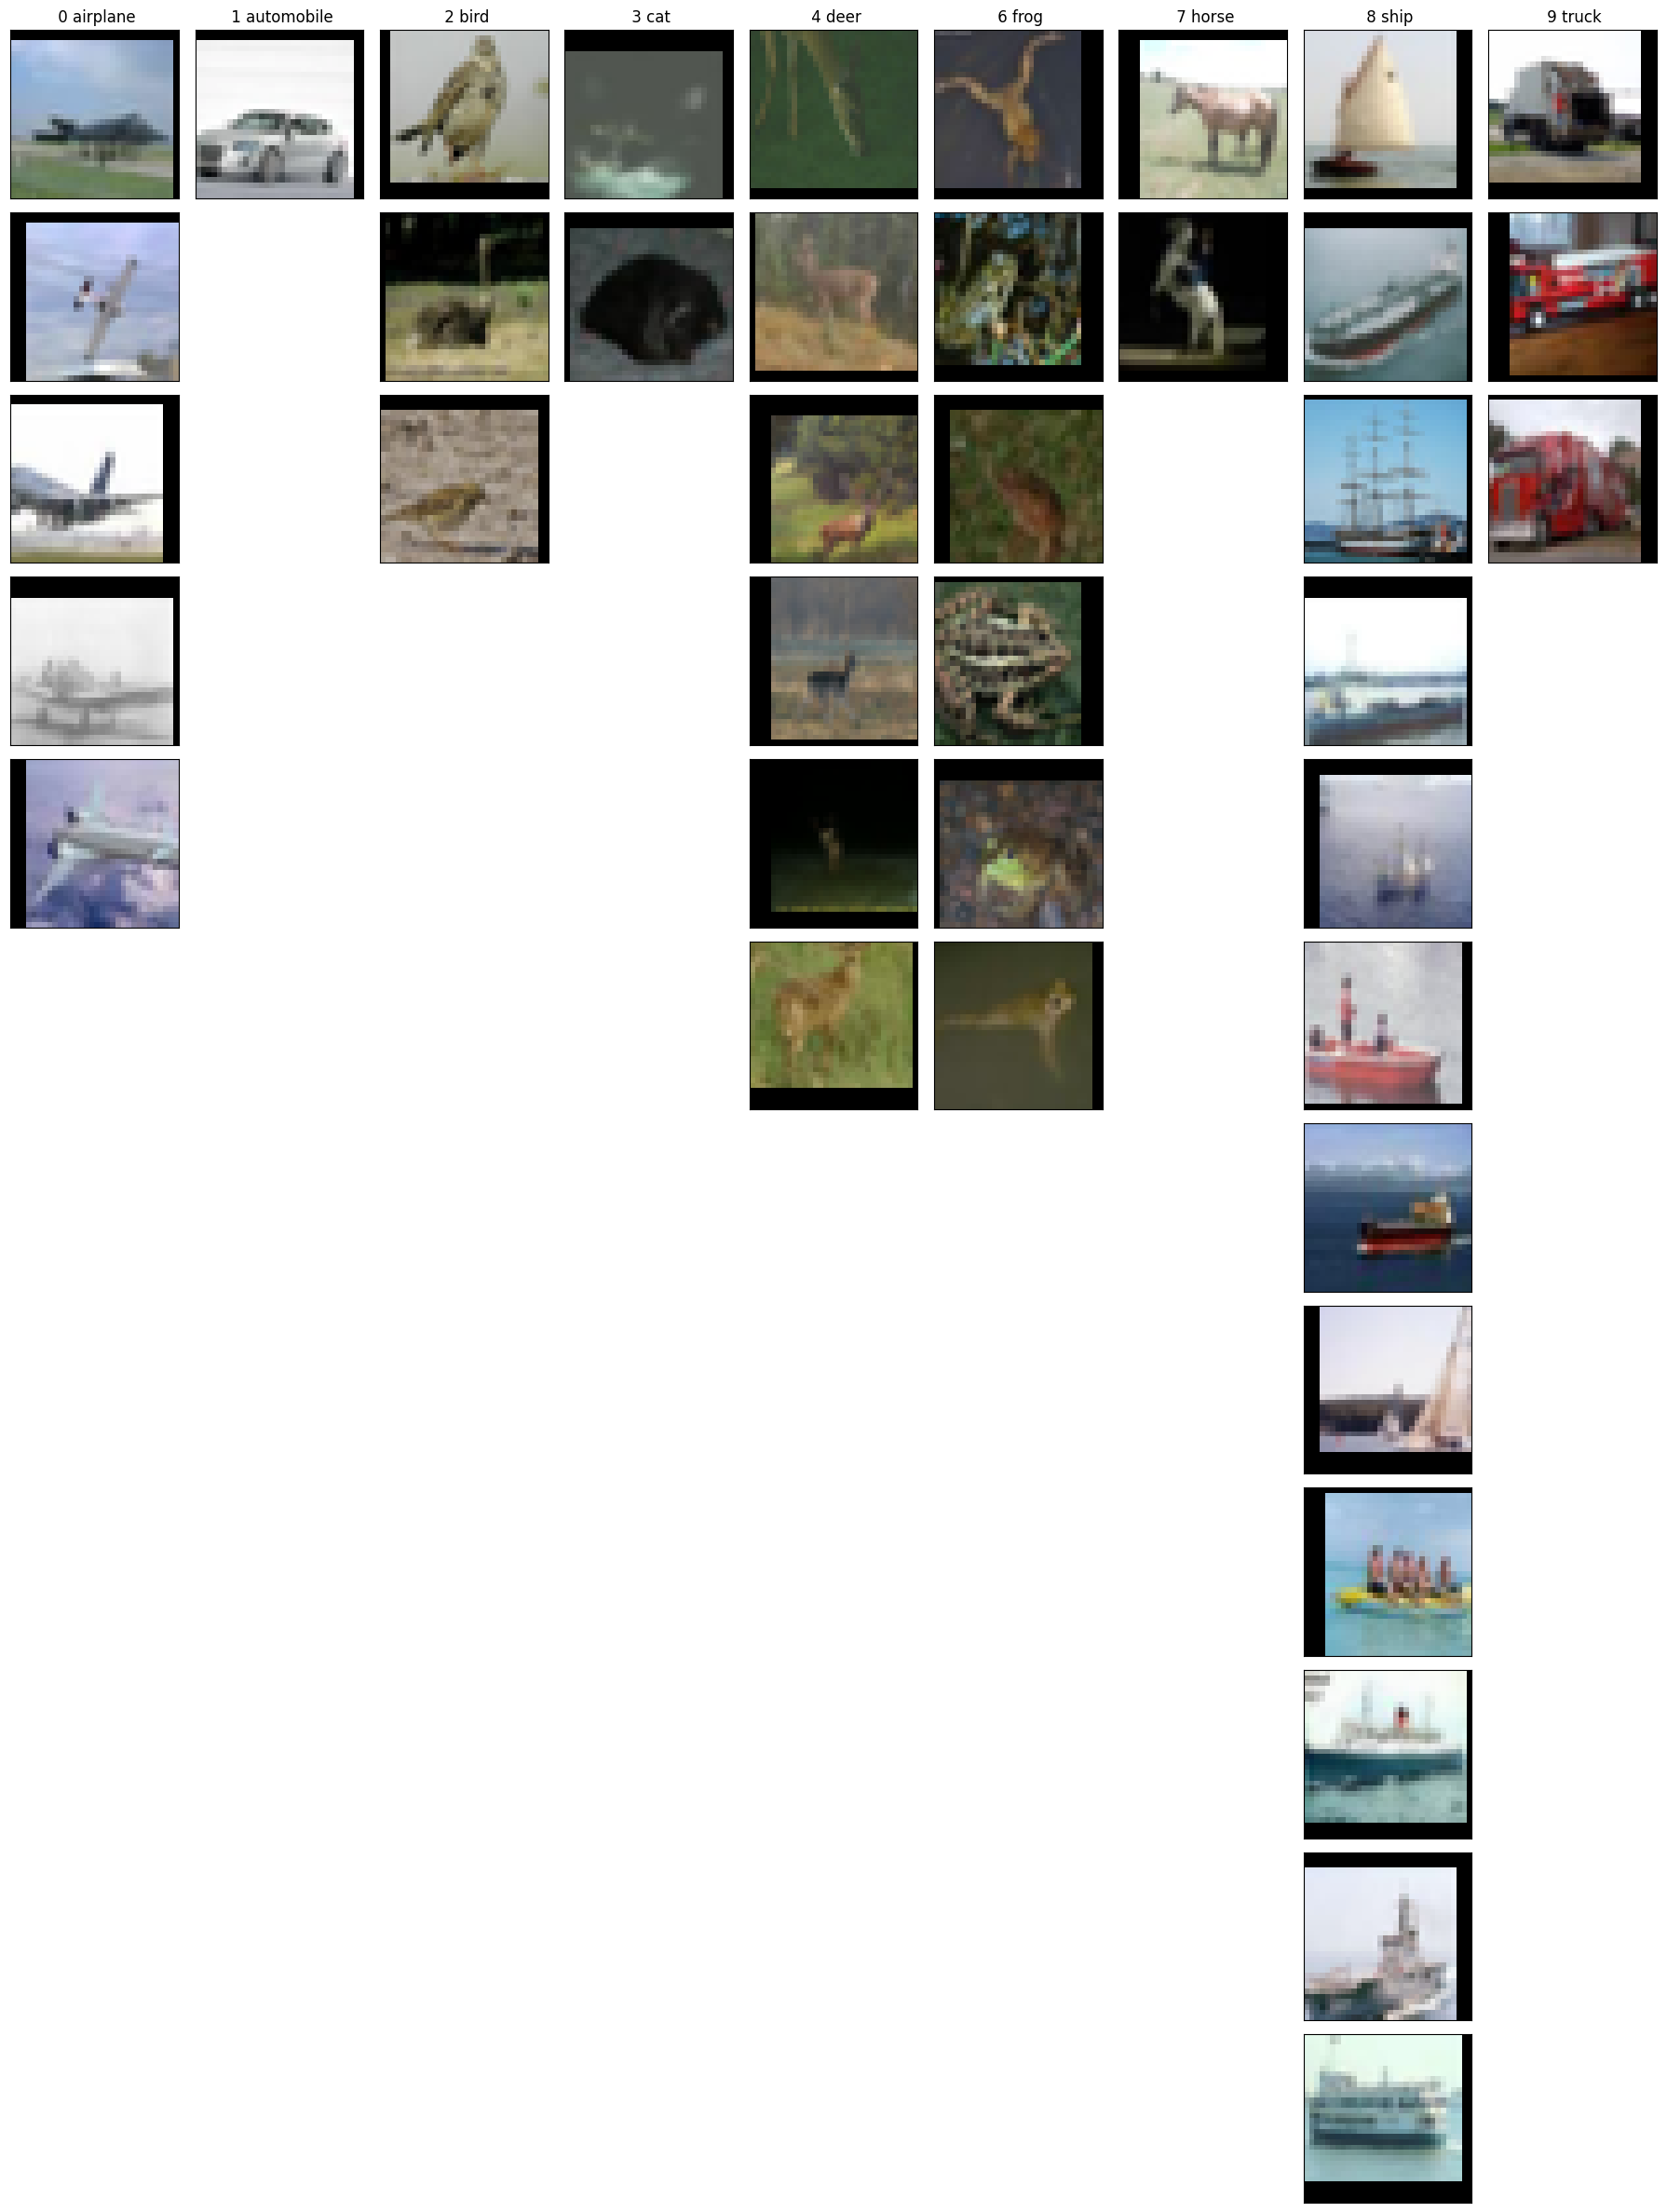

Number of training samples selected: 40
[Linear Eval] Epoch [1/100] Loss: 48.7814
[Linear Eval] Epoch [2/100] Loss: 151.4052
[Linear Eval] Epoch [3/100] Loss: 210.3341
[Linear Eval] Epoch [4/100] Loss: 225.2064
[Linear Eval] Epoch [5/100] Loss: 166.8732
[Linear Eval] Epoch [6/100] Loss: 374.4013
[Linear Eval] Epoch [7/100] Loss: 199.7053
[Linear Eval] Epoch [8/100] Loss: 144.2088
[Linear Eval] Epoch [9/100] Loss: 180.4949
[Linear Eval] Epoch [10/100] Loss: 179.5676
[Linear Eval] Epoch [11/100] Loss: 183.2409
[Linear Eval] Epoch [12/100] Loss: 175.4573
[Linear Eval] Epoch [13/100] Loss: 194.9137
[Linear Eval] Epoch [14/100] Loss: 153.8308
[Linear Eval] Epoch [15/100] Loss: 153.7453
[Linear Eval] Epoch [16/100] Loss: 241.5375
[Linear Eval] Epoch [17/100] Loss: 173.5904
[Linear Eval] Epoch [18/100] Loss: 93.3601
[Linear Eval] Epoch [19/100] Loss: 124.6814
[Linear Eval] Epoch [20/100] Loss: 185.6040
[Linear Eval] Epoch [21/100] Loss: 92.2817
[Linear Eval] Epoch [22/100] Loss: 91.4841
[Line

c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Loaded pretrained SimCLR model.
Loaded pretrained SimCLR model for TPCRP selection.


C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=DEV

Unique final selected indices: 50
selected_indices: [np.int64(8254), np.int64(25060), np.int64(17016), np.int64(36750), np.int64(8849), np.int64(30271), np.int64(41851), np.int64(49497), np.int64(33549), np.int64(41033), np.int64(7703), np.int64(42197), np.int64(17870), np.int64(27571), np.int64(41054), np.int64(40468), np.int64(46801), np.int64(23472), np.int64(39474), np.int64(32644), np.int64(44629), np.int64(9858), np.int64(46803), np.int64(42247), np.int64(18630), np.int64(5634), np.int64(35985), np.int64(2176), np.int64(45505), np.int64(48674), np.int64(32813), np.int64(5405), np.int64(10646), np.int64(14821), np.int64(33862), np.int64(4540), np.int64(41634), np.int64(32132), np.int64(13575), np.int64(45110), np.int64(33245), np.int64(45175), np.int64(23109), np.int64(19489), np.int64(4300), np.int64(6406), np.int64(7811), np.int64(12697), np.int64(25959), np.int64(16865)]
Number of clusters (budget) = 50
Number of typical points selected = 50


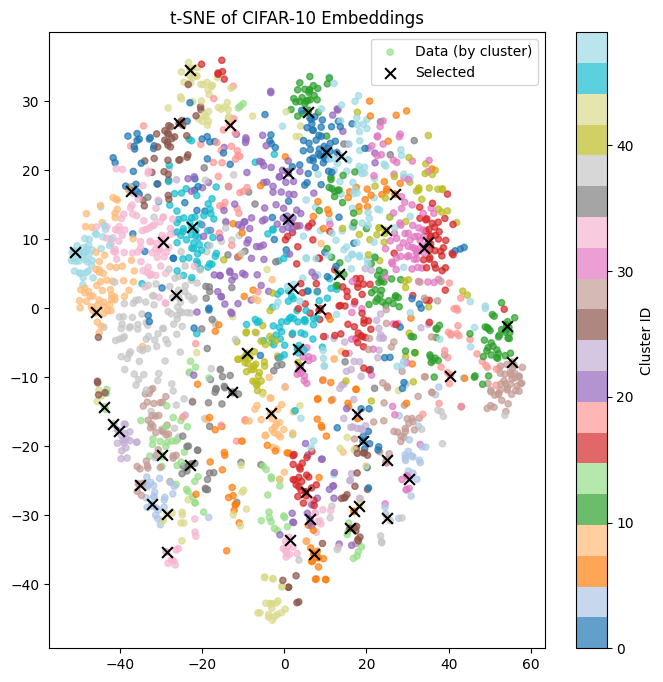

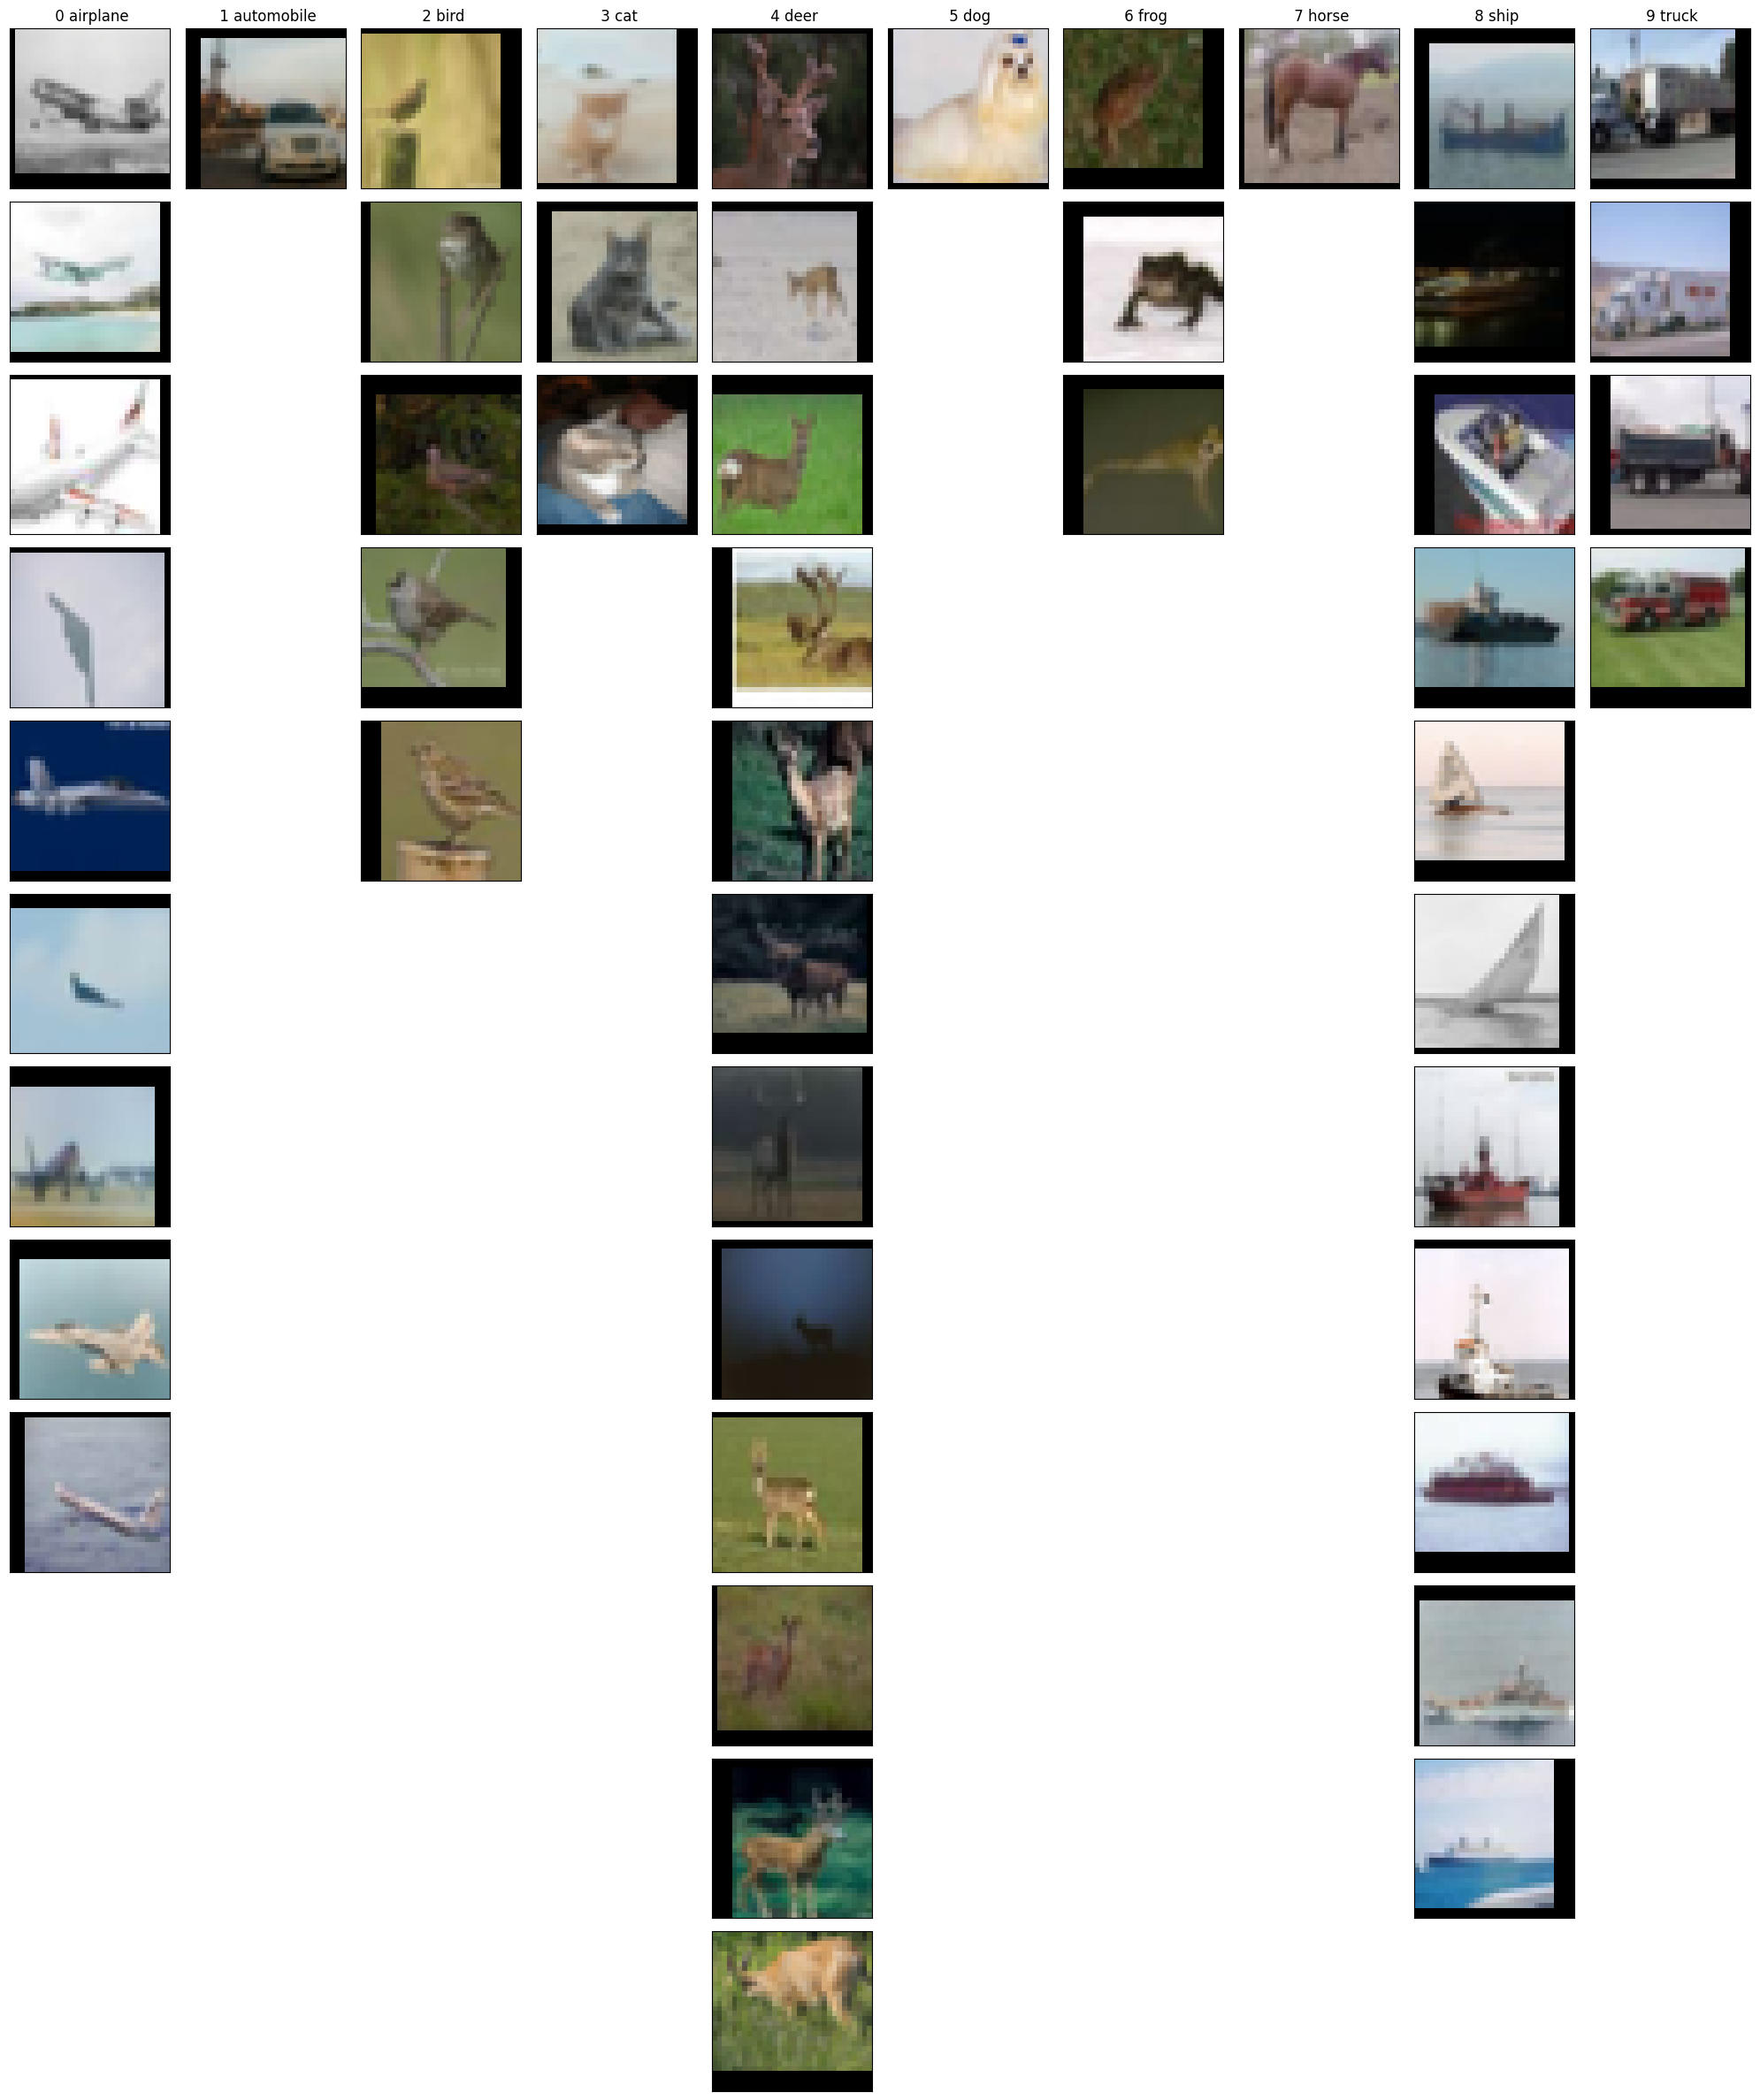

Number of training samples selected: 50
[Linear Eval] Epoch [1/100] Loss: 15.0244
[Linear Eval] Epoch [2/100] Loss: 163.4214
[Linear Eval] Epoch [3/100] Loss: 145.0384
[Linear Eval] Epoch [4/100] Loss: 131.9533
[Linear Eval] Epoch [5/100] Loss: 100.3049
[Linear Eval] Epoch [6/100] Loss: 132.8136
[Linear Eval] Epoch [7/100] Loss: 183.4757
[Linear Eval] Epoch [8/100] Loss: 97.0955
[Linear Eval] Epoch [9/100] Loss: 96.9170
[Linear Eval] Epoch [10/100] Loss: 122.5892
[Linear Eval] Epoch [11/100] Loss: 132.0960
[Linear Eval] Epoch [12/100] Loss: 125.0001
[Linear Eval] Epoch [13/100] Loss: 83.3986
[Linear Eval] Epoch [14/100] Loss: 81.3410
[Linear Eval] Epoch [15/100] Loss: 92.8157
[Linear Eval] Epoch [16/100] Loss: 123.3237
[Linear Eval] Epoch [17/100] Loss: 66.0597
[Linear Eval] Epoch [18/100] Loss: 57.6153
[Linear Eval] Epoch [19/100] Loss: 41.7081
[Linear Eval] Epoch [20/100] Loss: 53.3323
[Linear Eval] Epoch [21/100] Loss: 64.9819
[Linear Eval] Epoch [22/100] Loss: 49.6907
[Linear Eval]

c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sheraz\anaconda3\envs\ml_coursework2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Sheraz\AppData\Local\Temp\ipykernel_30280\1861935456.py:192: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

Loaded pretrained SimCLR model.
Number of training samples selected: 10
[Linear Eval] Epoch [1/100] Loss: 2.6086
[Linear Eval] Epoch [2/100] Loss: 154.1106
[Linear Eval] Epoch [3/100] Loss: 328.8371
[Linear Eval] Epoch [4/100] Loss: 455.1317
[Linear Eval] Epoch [5/100] Loss: 268.7485
[Linear Eval] Epoch [6/100] Loss: 412.5298
[Linear Eval] Epoch [7/100] Loss: 583.5265
[Linear Eval] Epoch [8/100] Loss: 596.6465
[Linear Eval] Epoch [9/100] Loss: 704.7593
[Linear Eval] Epoch [10/100] Loss: 836.6473
[Linear Eval] Epoch [11/100] Loss: 544.3489
[Linear Eval] Epoch [12/100] Loss: 718.8458
[Linear Eval] Epoch [13/100] Loss: 716.1674
[Linear Eval] Epoch [14/100] Loss: 228.7518
[Linear Eval] Epoch [15/100] Loss: 337.9040
[Linear Eval] Epoch [16/100] Loss: 430.6911
[Linear Eval] Epoch [17/100] Loss: 351.6297
[Linear Eval] Epoch [18/100] Loss: 375.3959
[Linear Eval] Epoch [19/100] Loss: 383.1555
[Linear Eval] Epoch [20/100] Loss: 247.1763
[Linear Eval] Epoch [21/100] Loss: 247.2796
[Linear Eval] E

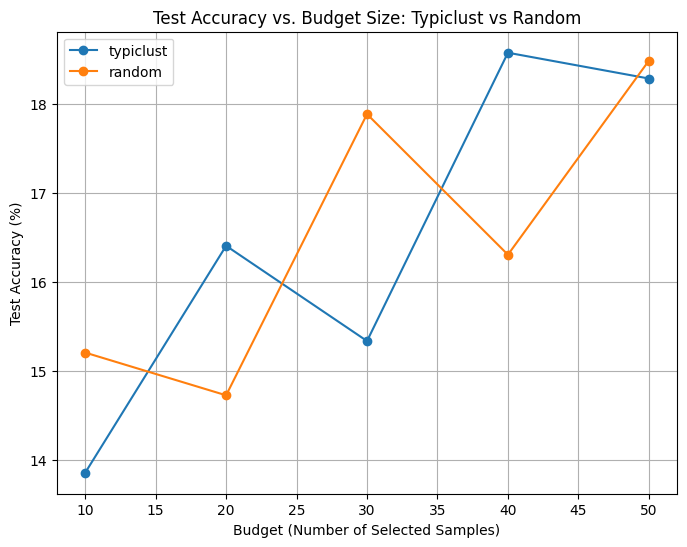

In [ ]:
# Set random seed for reproducibility.
set_seed(30)


def evaluate_linear(encoder, linear_head, dataloader, device=DEVICE):
    """
    Evaluates the combination of the frozen encoder and the trained linear head.
    """
    encoder.eval()
    linear_head.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            feats = encoder(images)
            outputs = linear_head(feats)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    acc = correct / total
    print(f"Linear Evaluation Test Accuracy: {acc*100:.2f}%")
    return acc


def get_cifar10_datasets():
    """
    Loads CIFAR-10 training and test datasets.
    For training, uses random crop and horizontal flip (per Appendix F.2.1 for fully supervised training)
    """
    train_transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.247, 0.243, 0.261))
    ])
    test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465),
                             (0.247, 0.243, 0.261))
    ])
    train_dataset = torchvision.datasets.CIFAR10(
        root="./data", train=True, download=True, transform=train_transform)
    test_dataset = torchvision.datasets.CIFAR10(
        root="./data", train=False, download=True, transform=test_transform)
    return train_dataset, test_dataset



# Fully Supervised with Self-Supervised Embeddings (Linear Evaluation)
def train_linear_classifier(encoder, train_dataset, selected_indices, epochs, device=DEVICE):
    """
    Trains a linear classifier on top of the frozen pre-trained encoder.
    Hyperparameters follow Appendix F.2.2: SGD with lr=2.5, momentum=0.9, cosine scheduler.
    """
    subset = Subset(train_dataset, selected_indices)
    train_loader = DataLoader(subset, batch_size=32, shuffle=True)
    encoder.eval()
    for param in encoder.parameters():
        param.requires_grad = False
    linear_head = nn.Linear(512, 10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(linear_head.parameters(), lr=2.5, momentum=0.9, nesterov=True)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    linear_head.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            with torch.no_grad():
                feats = encoder(images)
            logits = linear_head(feats)
            loss = criterion(logits, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()
        avg_loss = total_loss / len(train_loader)
        print(f"[Linear Eval] Epoch [{epoch+1}/{epochs}] Loss: {avg_loss:.4f}")
    return linear_head


def select_samples(train_dataset, budget, method='typiclust'):
    import numpy as np
    """
    Selects a subset of samples from the training dataset.
    If method == 'typiclust', uses TPCRP; if 'random', selects uniformly.
    """
    if method == 'typiclust':
        encoder = SimCLRResNet18(feature_dim=128).to(DEVICE)
        checkpoint_path = 'model/simclr_cifar_10.pth.tar'
        if os.path.exists(checkpoint_path):
            checkpoint = torch.load(checkpoint_path, map_location=DEVICE)
            state_dict = checkpoint.get('state_dict', checkpoint)
            encoder.load_state_dict(state_dict, strict=False)
            print("Loaded pretrained SimCLR model for TPCRP selection.")
        else:
            print("Pretrained checkpoint not found; TPCRP selection may be affected.")
        encoder.eval()

        # 1) Compute embeddings
        all_embeddings, _ = compute_embeddings(encoder, train_dataset, batch_size=128, num_workers=4)
        
        # 2) Perform clustering to find typical samples
        selected_indices, cluster_labels = typical_clustering_selection(
            all_embeddings, budget=budget, k_nn=20, random_state=30
        )
        print("Unique final selected indices:", len(set(selected_indices)))
        print("selected_indices:", selected_indices)
        
        # 3) Print info
        print(f"Number of clusters (budget) = {budget}")
        print(f"Number of typical points selected = {len(selected_indices)}")
        
        # Check empty clusters
        import numpy as np
        for cluster_id in range(budget):
            cluster_idxs = np.where(cluster_labels == cluster_id)[0]
            if len(cluster_idxs) == 0:
                print(f"Cluster {cluster_id} is empty.")

        # 4) call plot_tsne, passing cluster_labels as the "cluster_assignments"
        #    and selected_indices as 'selected_indices' so they appear as black X.
        plot_tsne(
            embeddings=all_embeddings,
            cluster_assignments=cluster_labels,   # color by cluster
            selected_indices=selected_indices,     # mark typical points
            title="t-SNE of CIFAR-10 Embeddings",
            n_samples=2000
        )

        # 5) Show the actual images of the selected points in a grid, grouped by label
        #  need the label array for all data: label_array[i] = dataset[i][1].
        label_array = np.array([train_dataset[i][1] for i in range(len(train_dataset))])
        
        # We'll display up to 3 images per label column, for example
        plot_selected_images_by_label(
            dataset=train_dataset,
            selected_indices=selected_indices,
            label_array=label_array
            
        )

        return selected_indices
    elif method == 'random':
        total_samples = len(train_dataset)
        return random.sample(range(total_samples), budget)
    else:
        raise ValueError("Method must be 'typiclust' or 'random'.")


def evaluate_fully_supervised_self_supervised(method='typiclust', budget=100, epochs=100):
    """
    Fully Supervised with Self-Supervised Embeddings Framework:
    Loads a pre-trained SimCLR encoder (frozen), trains a linear classifier on top,
    and evaluates the combination on the test set.
    Hyperparameters follow Appendix F.2.2.
    """
    print("\n=== Fully Supervised with Self-Supervised Embeddings Evaluation ===")
    train_dataset, test_dataset = get_cifar10_datasets()
    encoder = SimCLRResNet18(feature_dim=128).to(DEVICE)
    checkpoint_path = 'model/simclr_cifar_10.pth.tar'
    if os.path.exists(checkpoint_path):
        checkpoint = torch.load(checkpoint_path, map_location=DEVICE)
        state_dict = checkpoint.get('state_dict', checkpoint)
        encoder.load_state_dict(state_dict, strict=False)
        print("Loaded pretrained SimCLR model.")
    else:
        print("Pretrained checkpoint not found; proceeding without pretraining.")
    encoder.eval()
    
    selected_indices = select_samples(train_dataset, budget, method)
    print(f"Number of training samples selected: {len(selected_indices)}")
    linear_head = train_linear_classifier(encoder, train_dataset, selected_indices, epochs, DEVICE)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
    # Use evaluate_linear to combine encoder and linear_head
    test_acc = evaluate_linear(encoder, linear_head, test_loader, DEVICE)
    return test_acc


def plot_accuracy_vs_budget_comparison(evaluation_func, budget_list, methods=['typiclust', 'random'], epochs=100):
    """
    Evaluates the fully supervised with self-supervised embeddings evaluation for each method
    and plots test accuracy vs. budget for each method on the same graph.
    """
    method_accuracies = {}
    for method in methods:
        accuracies = []
        for budget in budget_list:
            print(f"\n--- Evaluating for Budget = {budget}, Method = {method} ---")
            acc = evaluation_func(method=method, budget=budget, epochs=epochs)
            accuracies.append(acc * 100)  # Convert to percentage
        method_accuracies[method] = accuracies

    plt.figure(figsize=(8, 6))
    for method, accuracies in method_accuracies.items():
        plt.plot(budget_list, accuracies, marker='o', linestyle='-', label=method)
    plt.xlabel("Budget (Number of Selected Samples)")
    plt.ylabel("Test Accuracy (%)")
    plt.title("Test Accuracy vs. Budget Size: Typiclust vs Random")
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    # Plot accuracy vs. budget for fully supervised with self-supervised embeddings evaluation.
    budgets = [10, 20, 30, 40, 50]
    plot_accuracy_vs_budget_comparison(evaluate_fully_supervised_self_supervised, budgets, methods=['typiclust', 'random'], epochs=100)

if __name__ == "__main__":
    main()
